In [1]:

# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pydot

C:\Users\LCM\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


ModuleNotFoundError: No module named 'pydot'

In [2]:
# Generate 2 class dataset.
x, y = make_moons(n_samples = 10000, noise = 0.4, random_state=42)

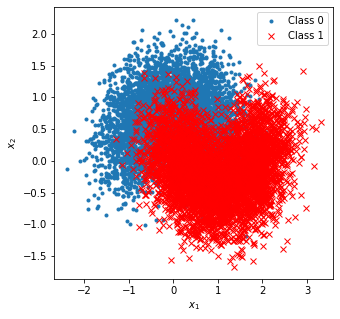

In [3]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [4]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

rs = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)
rs.get_n_splits(x_train)

1000

In [5]:

DTCS = []
ntrain = 1

for train_index, test_index in rs.split(x_train):
    print("Running training number " + str(ntrain))
    ntrain = ntrain + 1
    
    #param_grid = [{'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [None, 5, 10, 15, 25, 50]}]
    #DTC = DecisionTreeClassifier()
    #clf = GridSearchCV(DTC, param_grid, cv=5, verbose=3, n_jobs=-1)
    #clf.fit(x_train[train_index], y_train[train_index])
    #dtc = DecisionTreeClassifier(criterion=clf.best_params_.get('criterion'), max_leaf_nodes=clf.best_params_.get('max_leaf_nodes'))
    #dtc.fit(x_train[train_index], y_train[train_index])
    
    dtc = DecisionTreeClassifier(criterion='gini', max_depth = None, max_leaf_nodes = 25)
    dtc.fit(x_train[train_index], y_train[train_index])
    
    ###y_pred = DTC.predict(x_train[test_index])
    ###accuracy = accuracy_score(y_train[test_index], y_pred)
    ###print('accuracy: ',accuracy)

    DTCS.append(dtc)

Running training number 1
Running training number 2
Running training number 3
Running training number 4
Running training number 5
Running training number 6
Running training number 7
Running training number 8
Running training number 9
Running training number 10
Running training number 11
Running training number 12
Running training number 13
Running training number 14
Running training number 15
Running training number 16
Running training number 17
Running training number 18
Running training number 19
Running training number 20
Running training number 21
Running training number 22
Running training number 23
Running training number 24
Running training number 25
Running training number 26
Running training number 27
Running training number 28
Running training number 29
Running training number 30
Running training number 31
Running training number 32
Running training number 33
Running training number 34
Running training number 35
Running training number 36
Running training number 37
Running tr

Running training number 355
Running training number 356
Running training number 357
Running training number 358
Running training number 359
Running training number 360
Running training number 361
Running training number 362
Running training number 363
Running training number 364
Running training number 365
Running training number 366
Running training number 367
Running training number 368
Running training number 369
Running training number 370
Running training number 371
Running training number 372
Running training number 373
Running training number 374
Running training number 375
Running training number 376
Running training number 377
Running training number 378
Running training number 379
Running training number 380
Running training number 381
Running training number 382
Running training number 383
Running training number 384
Running training number 385
Running training number 386
Running training number 387
Running training number 388
Running training number 389
Running training num

Running training number 710
Running training number 711
Running training number 712
Running training number 713
Running training number 714
Running training number 715
Running training number 716
Running training number 717
Running training number 718
Running training number 719
Running training number 720
Running training number 721
Running training number 722
Running training number 723
Running training number 724
Running training number 725
Running training number 726
Running training number 727
Running training number 728
Running training number 729
Running training number 730
Running training number 731
Running training number 732
Running training number 733
Running training number 734
Running training number 735
Running training number 736
Running training number 737
Running training number 738
Running training number 739
Running training number 740
Running training number 741
Running training number 742
Running training number 743
Running training number 744
Running training num

In [6]:
frequence = [(0, 0)]*(len(x_test))

for i in range(len(DTCS)):
    y_pred = DTCS[i].predict(x_test)
    for j in range(len(x_test)):
        fs = frequence[j][0]
        sc = frequence[j][1]
        if( y_pred[j] == 0 ) : fs = fs + 1
        if( y_pred[j] == 1 ) : sc = sc + 1
        frequence[j] = (fs, sc)
        
y_pred = np.zeros(len(y_test))
for i in range(len(x_test)):
    fs = frequence[i][0]
    sc = frequence[i][1]
    if( fs >= sc ) : y_pred[i] = 0
    else : y_pred[i]= 1

accuracy = accuracy_score(y_test, y_pred) 
print(accuracy)

0.868
